# Challenge: Preparing a dataset for modeling
Unit 2 / Lesson 1 / Project 8

Now it's time to play with some data.
You're going to work through the stages of model preparation we've covered in this lesson and write up each one.

Using a dataset of your choice, select an outcome variable and then pick four or five other variables (one to two categorical, three to four continuous) to act as the basis for features.
Explore the variables using the univariate and bivariate methods you've learned so far.

Next, based on what you learned via your data exploration, create ten new features.
Explain the reasoning behind each one.

Finally, use filtering methods to select the five best features and justify your choices.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import scipy.stats as stats
#import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%matplotlib inline

# Setting the default plot aesthetics to be prettier.
sns.set_style("white")

For our analysis we'll use the [80 Cereals](https://www.kaggle.com/crawford/80-cereals#cereal.csv) dataset from Kaggle that contains nutrition data on 80 cereal products.


__Fields in the dataset__:

- Name: Name of cereal
- mfr: Manufacturer of cereal
    - A = American Home Food Products;
    - G = General Mills
    - K = Kelloggs
    - N = Nabisco
    - P = Post
    - Q = Quaker Oats
    - R = Ralston Purina
- type: cold/hot
- calories: calories per serving
- protein: grams of protein
- fat: grams of fat
- sodium: milligrams of sodium
- fiber: grams of dietary fiber
- carbo: grams of complex carbohydrates
- sugars: grams of sugars
- potass: milligrams of potassium
- vitamins: vitamins and minerals - 0, 25, or 100, indicating the typical percentage of FDA recommended
- shelf: display shelf (1, 2, or 3, counting from the floor)
- weight: weight in ounces of one serving
- cups: number of cups in one serving
- rating: a rating of the cereals (Possibly from Consumer Reports?)


__Acknowledgements__:

These datasets have been gathered and cleaned up by Petra Isenberg, Pierre Dragicevic and Yvonne Jansen. The original source can be found [here](https://perso.telecom-paristech.fr/eagan/class/igr204/datasets)

In [2]:
# Load cereal.csv

PATH = 'assets/80-cereals/cereal.csv'

df = pd.read_csv(PATH)

print(df.mfr.unique())

df.head()

['N' 'Q' 'K' 'R' 'G' 'P' 'A']


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [3]:
# explore the data

print(df.shape)

(77, 16)


### Explore Data

Our dataset contains a __rating__ column that we'll use as our outcome variable.
We'll select variables from the dataset that we'll use to create a model to predict cereal rating.

The variables we'll focus on are calories, protein, fat, sodium, fiber, carbohydrates (carbo), and sugar(s). All variables are continuous numerical data.

Other variables we can use to further our analysis are hot/cold cereal, potassium (potass), vitamins, shelf position (shelf), weight, and cups. We also have product name and manufacturer information for each cereal.

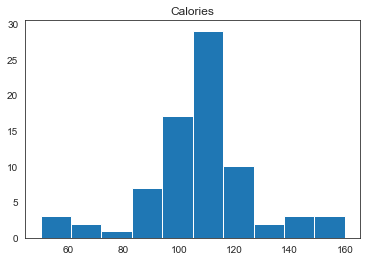

count     77.000000
mean     106.883117
std       19.484119
min       50.000000
25%      100.000000
50%      110.000000
75%      110.000000
max      160.000000
Name: calories, dtype: float64


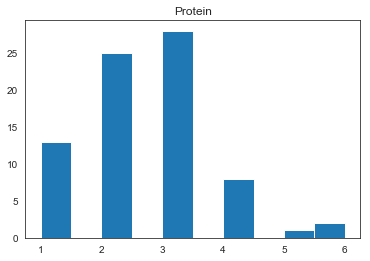

count    77.000000
mean      2.545455
std       1.094790
min       1.000000
25%       2.000000
50%       3.000000
75%       3.000000
max       6.000000
Name: protein, dtype: float64


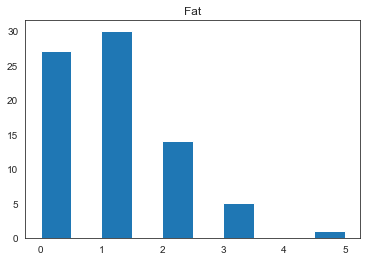

count    77.000000
mean      1.012987
std       1.006473
min       0.000000
25%       0.000000
50%       1.000000
75%       2.000000
max       5.000000
Name: fat, dtype: float64


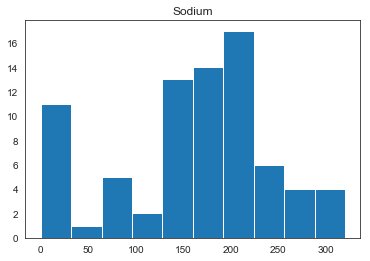

count     77.000000
mean     159.675325
std       83.832295
min        0.000000
25%      130.000000
50%      180.000000
75%      210.000000
max      320.000000
Name: sodium, dtype: float64


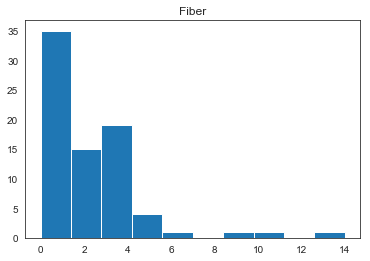

count    77.000000
mean      2.151948
std       2.383364
min       0.000000
25%       1.000000
50%       2.000000
75%       3.000000
max      14.000000
Name: fiber, dtype: float64


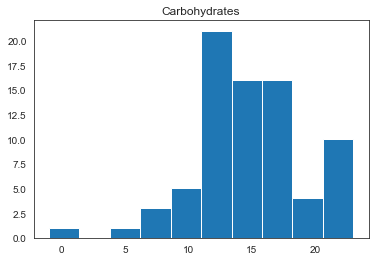

count    77.000000
mean     14.597403
std       4.278956
min      -1.000000
25%      12.000000
50%      14.000000
75%      17.000000
max      23.000000
Name: carbo, dtype: float64


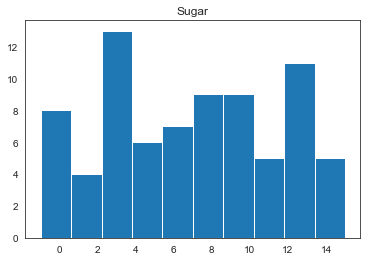

count    77.000000
mean      6.922078
std       4.444885
min      -1.000000
25%       3.000000
50%       7.000000
75%      11.000000
max      15.000000
Name: sugars, dtype: float64


In [4]:
# view our variables

plt.hist(df.calories.dropna())
plt.title('Calories')
plt.show()
print(df.calories.describe())

plt.hist(df.protein.dropna())
plt.title('Protein')
plt.show()
print(df.protein.describe())

plt.hist(df.fat.dropna())
plt.title('Fat')
plt.show()
print(df.fat.describe())

plt.hist(df.sodium.dropna())
plt.title('Sodium')
plt.show()
print(df.sodium.describe())

plt.hist(df.fiber.dropna())
plt.title('Fiber')
plt.show()
print(df.fiber.describe())

plt.hist(df.carbo.dropna())
plt.title('Carbohydrates')
plt.show()
print(df.carbo.describe())

plt.hist(df.sugars.dropna())
plt.title('Sugar')
plt.show()
print(df.sugars.describe())

### Feature Engineering

Let's create some features so we can get a better handle on our dataset. Let's start with creating features for each manufacturer. We can use this to compare trends across different manufacturers. For example, which manufacturer has the highest average rated cereal?

In [5]:
# create some dummy variables

# create a data frame to hold our features
features = pd.get_dummies(df.mfr)

# manufacturer dummies
features['AHFP'] = np.where((df.mfr.isin(['A'])), 1, 0)
features['GM'] = np.where((df.mfr.isin(['G'])), 1, 0)
features['Kellogs'] = np.where((df.mfr.isin(['K'])), 1, 0)
features['Nabisco'] = np.where((df.mfr.isin(['N'])), 1, 0)
features['Post'] = np.where((df.mfr.isin(['P'])), 1, 0)
features['Quaker'] = np.where((df.mfr.isin(['Q'])), 1, 0)
features['Purina'] = np.where((df.mfr.isin(['R'])), 1, 0)

print(pd.crosstab(features.AHFP, df.mfr))
print(pd.crosstab(features.GM, df.mfr))
print(pd.crosstab(features.Kellogs, df.mfr))
print(pd.crosstab(features.Nabisco, df.mfr))
print(pd.crosstab(features.Post, df.mfr))
print(pd.crosstab(features.Quaker, df.mfr))
print(pd.crosstab(features.Purina, df.mfr))

mfr   A   G   K  N  P  Q  R
AHFP                       
0     0  22  23  6  9  8  8
1     1   0   0  0  0  0  0
mfr  A   G   K  N  P  Q  R
GM                        
0    1   0  23  6  9  8  8
1    0  22   0  0  0  0  0
mfr      A   G   K  N  P  Q  R
Kellogs                       
0        1  22   0  6  9  8  8
1        0   0  23  0  0  0  0
mfr      A   G   K  N  P  Q  R
Nabisco                       
0        1  22  23  0  9  8  8
1        0   0   0  6  0  0  0
mfr   A   G   K  N  P  Q  R
Post                       
0     1  22  23  6  0  8  8
1     0   0   0  0  9  0  0
mfr     A   G   K  N  P  Q  R
Quaker                       
0       1  22  23  6  9  0  8
1       0   0   0  0  0  8  0
mfr     A   G   K  N  P  Q  R
Purina                       
0       1  22  23  6  9  8  0
1       0   0   0  0  0  0  8


It looks like Kellogs and General Mills are the two largest manufacturers, so let's focus our analysis on them.

In [6]:
# Take a subset of the data
df_kellog = df.loc[((df.mfr == 'K') | (df.mfr == 'G')), 
                 ['name', 'mfr', 'calories', 'protein', 'fat',
                  'sodium', 'fiber', 'carbo', 'sugars', 'potass',
                  'vitamins', 'shelf', 'weight', 'cups', 'rating']
]

df_kellog.head()

df_kellog.mfr.value_counts()

K    23
G    22
Name: mfr, dtype: int64

C:\Users\Aaron\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


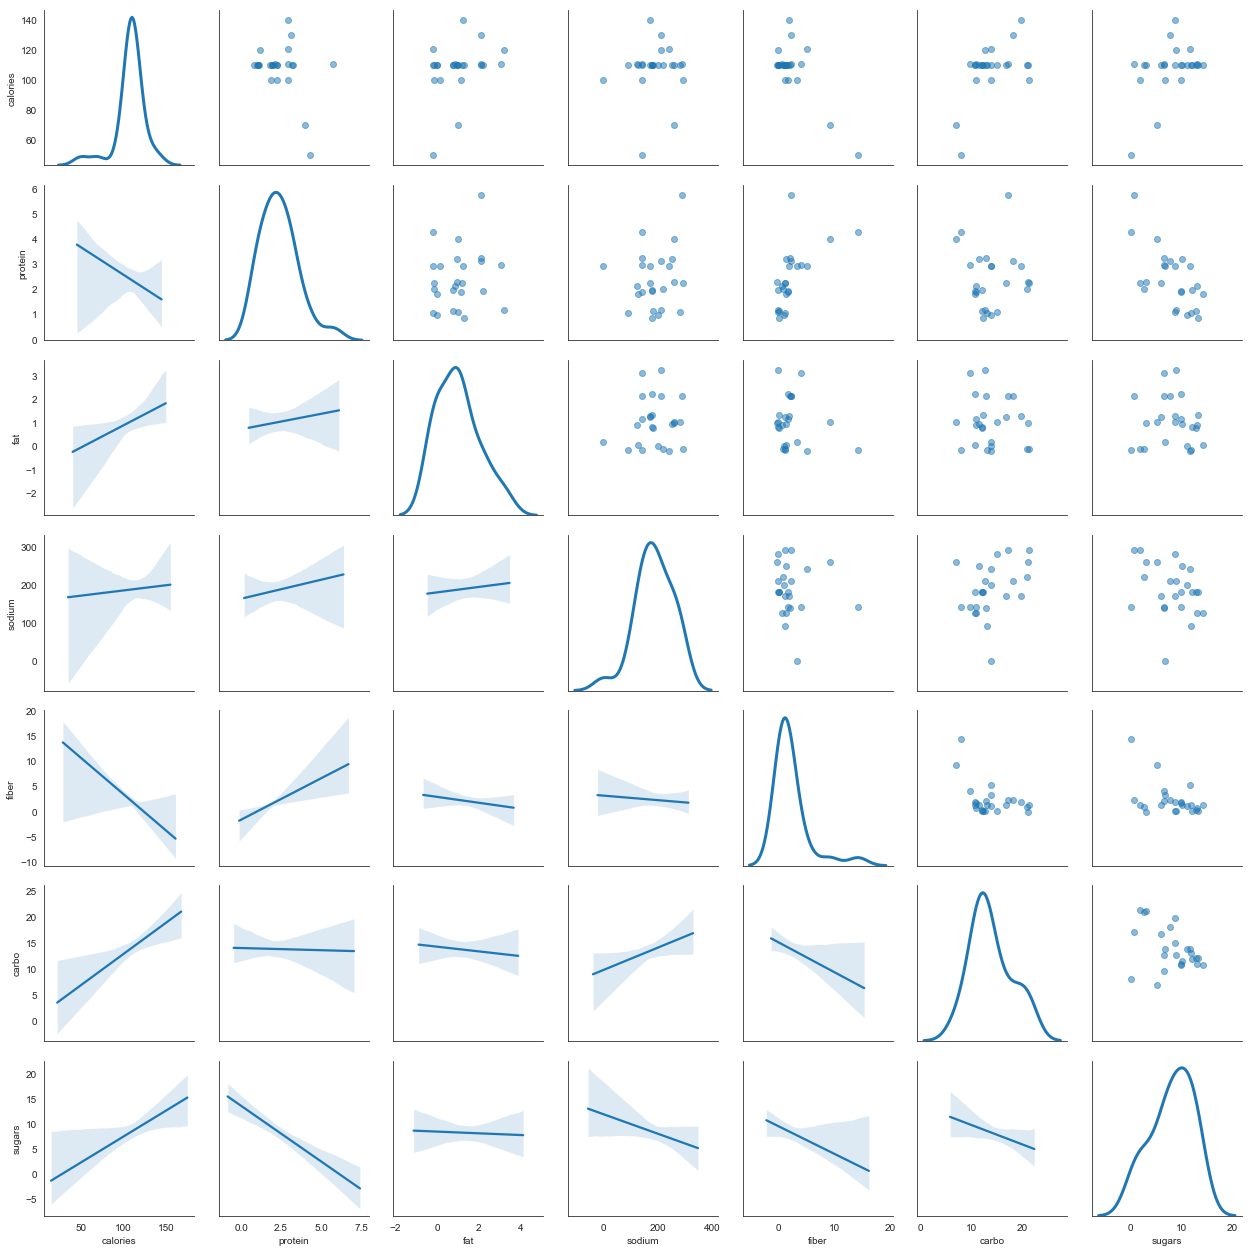

In [7]:
# create a jitter dataframe

# Make a copy of the data to add jitter to and plot.
df_jittered = df_kellog.loc[:, 'calories':'sugars'].dropna()

# make the random noise
jitter = pd.DataFrame(np.random.uniform(-.3, .3, size=(df_jittered.shape)),
                      columns=df_jittered.columns
                     )

# combine the data and the noise
df_jittered = df_jittered.add(jitter)

# declare that you want to make a scatterplot matrix
g = sns.PairGrid(df_jittered.dropna(), diag_sharey=False)

# scatterplot
g.map_upper(plt.scatter, alpha=0.5)

# fit line summarizing the linear relationship of the two variables
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))

# give information about the univariate distributions of the variables
g.map_diag(sns.kdeplot, lw=3)


plt.show()

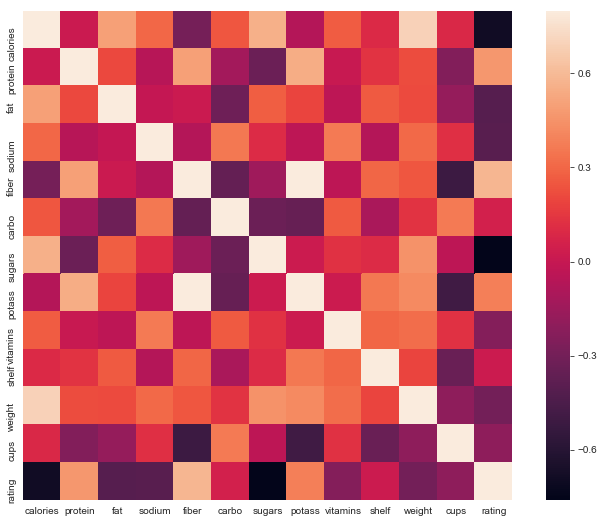

In [8]:
# let's check for correlation
corrmat = df.corr()

# set up the matplotlib figure
f, ax = plt.subplots(figsize=(12,9))

# draw heatmap with seaborn
sns.heatmap(corrmat, vmax=0.8, square=True)

plt.show()

Looks like fiber and potassium are highly correlated with each other, so let's create a `fiber-potass` feature that will accomodate for this correlation.

Let's start this by taking averages of the two variables.
Just in case some of the variables are on different scales than others we scale them before averaging by subtracting the average of each variable from all values in that variable, then dividing by the standard deviation.

In [9]:
# takes means and standard deviation of columns
means = df[['fiber', 'potass']].mean(axis=0)
stds = df[['fiber', 'potass']].std(axis=0)

# create composite dummy for fiber and potass
# subtract means from columns, then divide by standard deviation
# this will scale all the different values of each column
features['fiber_potass'] = ((df[['fiber', 'potass']] - means) / stds).mean(axis=1)

# Check how well the composite correlates with each of the individual variables
plotdf = df.loc[:, ['fiber', 'potass']]
plotdf['fiber_potass'] = features['fiber_potass']
corrmat2 = plotdf.corr()

print(corrmat2)

                 fiber    potass  fiber_potass
fiber         1.000000  0.903374      0.975544
potass        0.903374  1.000000      0.975544
fiber_potass  0.975544  0.975544      1.000000


Now let's create a feature to turn some of our numerical data into categorical data.
Let's start with looking at _high calorie_ and _low calorie_ cereals.

In [10]:
# create a categorical feature for high and low calorie cereals
features['Cal_high'] = np.where(df.calories>=(df.calories.mean() + df.calories.std()), 1, 0)
features['Cal_low'] = np.where(df.calories>=(df.calories.mean() - df.calories.std()), 0, 1)

# check to make sure it worked
print(df.calories.groupby(features.Cal_high).describe())
print(df.calories.groupby(features.Cal_low).describe())
print(df.calories.describe())

          count        mean        std    min    25%    50%    75%    max
Cal_high                                                                 
0          69.0  102.753623  15.707254   50.0  100.0  110.0  110.0  120.0
1           8.0  142.500000  10.350983  130.0  137.5  140.0  150.0  160.0
         count        mean        std   min    25%    50%    75%    max
Cal_low                                                                
0         71.0  110.704225  14.474011  90.0  100.0  110.0  115.0  160.0
1          6.0   61.666667  13.291601  50.0   50.0   60.0   70.0   80.0
count     77.000000
mean     106.883117
std       19.484119
min       50.000000
25%      100.000000
50%      110.000000
75%      110.000000
max      160.000000
Name: calories, dtype: float64


We can now use this feature to compare high/low calorie cereals across manufactures and our other variables.
We could use this to determine if caloric content has an affect on cereal rating.

Let's repeat this process for some more of our continuous variables.

In [11]:
# repeat for protein, fat, sodium, fiber, carbs, and sugar

#protein
features['protein_high'] = np.where(df.protein>=(df.protein.mean() + df.protein.std()), 1, 0)
features['protein_low'] = np.where(df.protein>=(df.protein.mean() - df.protein.std()), 0, 1)

#fat
features['fat_high'] = np.where(df.fat>=(df.fat.mean() + df.fat.std()), 1, 0)
features['fat_low'] = np.where(df.fat>=(df.fat.mean() - df.fat.std()), 0, 1)

#sodium
features['sodium_high'] = np.where(df.sodium>=(df.sodium.mean() + df.sodium.std()), 1, 0)
features['sodium_low'] = np.where(df.sodium>=(df.sodium.mean() - df.sodium.std()), 0, 1)

#fiber
features['fiber_high'] = np.where(df.fiber>=(df.fiber.mean() + df.fiber.std()), 1, 0)
features['fiber_low'] = np.where(df.fiber>=(df.fiber.mean() - df.fiber.std()), 0, 1)

#carbo
features['carbo_high'] = np.where(df.carbo>=(df.carbo.mean() + df.carbo.std()), 1, 0)
features['carbo_low'] = np.where(df.carbo>=(df.carbo.mean() - df.carbo.std()), 0, 1)

#sugars
features['sugars_high'] = np.where(df.sugars>=(df.sugars.mean() + df.sugars.std()), 1, 0)
features['sugars_low'] = np.where(df.sugars>=(df.sugars.mean() - df.sugars.std()), 0, 1)

### Feature Selection

Now that we have some features, let's see if we can spot some trends in the data

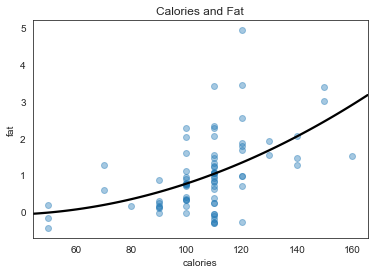

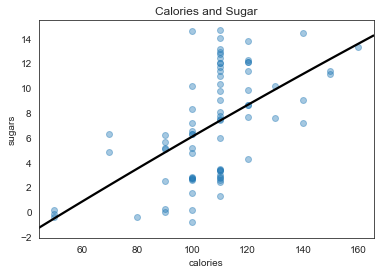

In [14]:
# view relationship between calories and fat
sns.regplot(
    df.calories,
    y=df.fat,
    y_jitter=0.49,
    order=2,
    scatter_kws={'alpha':0.4},
    line_kws={'color':'black'},
    ci=None
)
plt.title('Calories and Fat')

plt.show()


# view linear relationship between calories and sugar
sns.regplot(
    df.calories,
    y=df.sugars,
    y_jitter=0.49,
    order=2,
    scatter_kws={'alpha':0.4},
    line_kws={'color':'black'},
    ci=None
)
plt.title('Calories and Sugar')

plt.show()

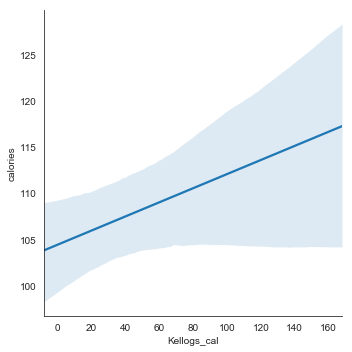

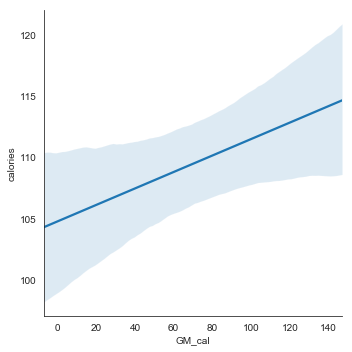

In [15]:
# create the interaction
features['Kellogs_cal'] = df.calories * features.Kellogs
features['GM_cal'] = df.calories * features.GM

# A plot of an interaction.
# Add the 'tvtot' feature to the features data frame for plotting.
features['calories'] = df['calories']
sns.lmplot(
    x='Kellogs_cal',
    y='calories',
    #hue='calories',
    data=features,
    scatter=False
)

plt.show()


sns.lmplot(
    x='GM_cal',
    y='calories',
    #hue='calories',
    data=features,
    scatter=False
)

plt.show()

It looks like there are definitely some trends in caloric data. Let's see if that can be used to model cereal rating. 


### Principal Components Analysis

Let's perform some PCA to see if we can better model our cereal ratings.

In [16]:
# create a dataframe of only the numerical data we'd like to use
df_num = df.iloc[:,3:15]

df_num.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33
1,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00
2,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33
3,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50
4,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75


In [18]:
# use sklearn PCA functuon

# perform PCA that contains 95% of the variance of the original data
sklearn_pca = PCA(0.95)

Y_sklearn = sklearn_pca.fit_transform(df_num)

sklearn_pca.explained_variance_ratio_

array([0.54899226, 0.38908202, 0.03580218])

It looks like our __Principal Components Analysis__ produced three components that can be used to effectively model our cereal ratings

In [21]:
# create a dataframe from PCA data
# rename columns for components 1-3
df_pca = pd.DataFrame(Y_sklearn, columns=['Comp_1', 'Comp_2', 'Comp_3'])

# add outcome data and labels
df_pca['name'] = df['name']
df_pca['mfr'] = df['mfr']
df_pca['rating'] = df['rating']

# view
df_pca.head()

,Comp_1,Comp_2,Comp_3,name,mfr,rating
0,-50.224688,180.772747,-17.473718,100% Bran,N,68.402973
1,-148.556713,24.309837,0.077378,100% Natural Bran,Q,33.983679
2,74.316448,232.902750,-33.904994,All-Bran,K,59.425505
3,-46.627921,231.685978,-28.782643,All-Bran with Extra Fiber,K,93.704912
4,49.009419,-92.807160,-6.230110,Almond Delight,R,34.384843


Using __PCA__ we can create a very effective model to predict cereal rating.
While this is sufficient on a theoretical level, it cannot be implemented in a practical way.
If we are trying to maximizing cereal rating for a potential employeer, we can't submit a report that says increase 'component 1' to produce higher average cereal ratings.

Let's see if we can create a more effective way to model cereal ratings using the features we created before.

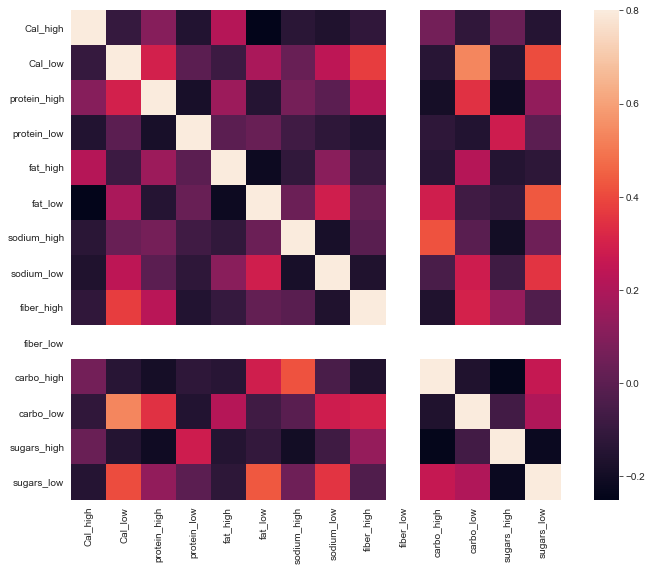

In [22]:
features['rating'] = df['rating']

# let's check for correlation
corrmat = features.loc[:,'Cal_high':'sugars_low'].corr()

# set up the matplotlib figure
f, ax = plt.subplots(figsize=(12,9))

# draw heatmap with seaborn
sns.heatmap(corrmat, vmax=0.8, square=True)

plt.show()

With our correlation heat map we can see which features correlate with ratings.

We can see some of our features aren't very helpful. For example, `fiber_low` looks like it wasn't calculated in a way that produced any helpful information.

In fact, most of the features don't appear to exhibit much correlation. This is a good sign as it means our features are unique and not redundent.

Comparing our features across the `ratings` data it looks there is some correlation with the `sugars_low`, `sodium_low`, `fat_low`, `fiber_potass`, `cal_low` features.

Let's see if we can visualize the correlation between our features and ratings.

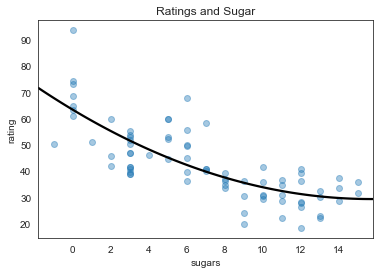

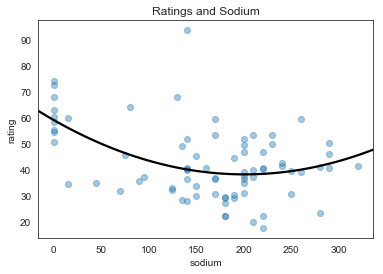

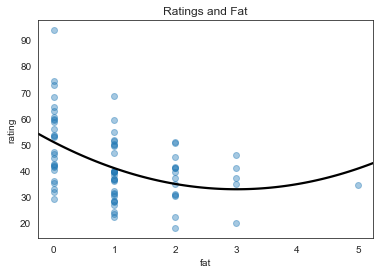

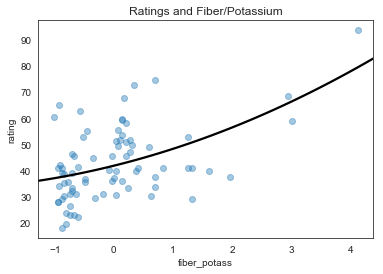

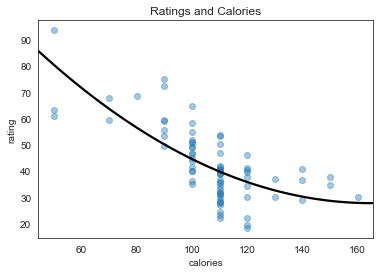

In [27]:
# view relationship between features and ratings

sns.regplot(
    x=df.sugars,
    y=df.rating,
    y_jitter=0.49,
    order=2,
    scatter_kws={'alpha':0.4},
    line_kws={'color':'black'},
    ci=None
)
plt.title('Ratings and Sugar')
plt.show()


sns.regplot(
    x=df.sodium,
    y=df.rating,
    y_jitter=0.49,
    order=2,
    scatter_kws={'alpha':0.4},
    line_kws={'color':'black'},
    ci=None
)
plt.title('Ratings and Sodium')
plt.show()


sns.regplot(
    x=df.fat,
    y=df.rating,
    y_jitter=0.49,
    order=2,
    scatter_kws={'alpha':0.4},
    line_kws={'color':'black'},
    ci=None
)
plt.title('Ratings and Fat')
plt.show()


sns.regplot(
    x=features.fiber_potass,
    y=features.rating,
    y_jitter=0.49,
    order=2,
    scatter_kws={'alpha':0.4},
    line_kws={'color':'black'},
    ci=None
)
plt.title('Ratings and Fiber/Potassium')
plt.show()


sns.regplot(
    x=df.calories,
    y=df.rating,
    y_jitter=0.49,
    order=2,
    scatter_kws={'alpha':0.4},
    line_kws={'color':'black'},
    ci=None
)
plt.title('Ratings and Calories')
plt.show()



We can see from the charts about that there is a negative correlation between cereal ratings and the amount of sugar, sodium, fat, and calorie count of the cereals.
We also observed that cereals that scored low on our fiber-potassium scale also had lower ratings.

We can use these features to understand what drives cereal ratings.
We could expect that cereals with low sugar, low sodium, low fat, lower calories per serving, and high fiber will rate higher than average cereals.